In [12]:
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.io as pio 
pio.renderers.default = "notebook_connected"
import numpy as np 
sns.set_style("whitegrid")
import warnings; warnings.simplefilter('ignore')

In [2]:
#load the drug200 csv data
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Exploratory Data Analysis

In [3]:
##Null values check
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
#check dtypes
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

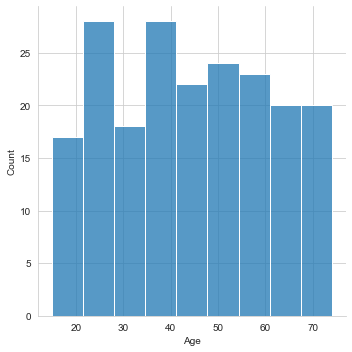

In [8]:
##Distribution of the numeric variables
sns.displot(df['Age'])

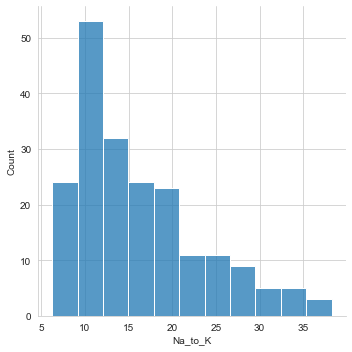

In [9]:
sns.displot(df['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='count'>

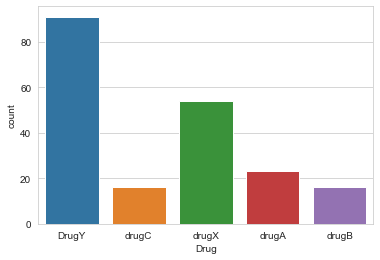

In [13]:
##count plots of categorical variables
sns.countplot(df['Drug'])

<AxesSubplot:xlabel='BP', ylabel='count'>

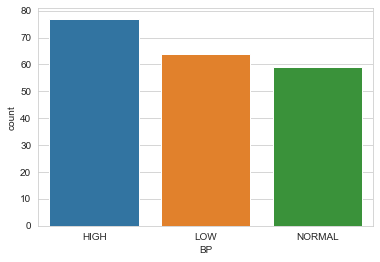

In [14]:
sns.countplot(df['BP'])

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

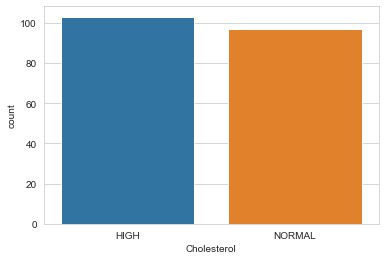

In [15]:
sns.countplot(df['Cholesterol'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

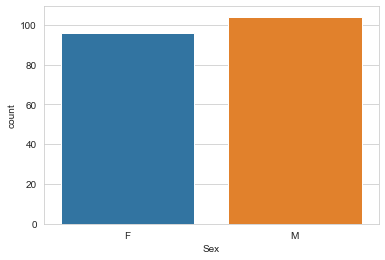

In [16]:
sns.countplot(df['Sex'])

In [25]:
fig = px.scatter(df,x='Drug',y='Age',color='BP')
fig.update_xaxes(type='category')
fig.show()

In [26]:
fig = px.scatter(df,x='Drug',y='Age',color='Sex')
fig.update_xaxes(type='category')
fig.show()

In [27]:
fig = px.scatter(df,x='Drug',y='Age',color='Cholesterol')
fig.update_xaxes(type='category')
fig.show()

In [28]:
fig = px.scatter(df,x='Drug',y='Age',color='BP',facet_col='Sex')
fig.update_xaxes(type='category')
fig.show()

In [29]:
fig = px.scatter(df,x='Drug',y='Age',color='Cholesterol',facet_col='Sex')
fig.update_xaxes(type='category')
fig.show()

In [30]:
##Some preprocessing
cols = ['Sex','BP','Cholesterol','Drug']


In [31]:
from sklearn.preprocessing import LabelEncoder
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [33]:
##Scale the numeric features
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ncols = ['Age','Na_to_K']
df[ncols] = ms.fit_transform(df[ncols])

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,0,0,0.596848,0
1,0.542373,1,1,0,0.213397,3
2,0.542373,1,1,0,0.120239,3
3,0.220339,0,2,0,0.047814,4
4,0.779661,0,1,0,0.368191,0


In [35]:
x = df.drop(['Drug'],axis=1)
y = df['Drug']

In [36]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
models = {}